# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("data")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

#define constant dimensions of the sample
sample_length = 8 #mm
sample_width = 3 #mm

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,dra-eco,238,data\Dra-Eco\Ecoflex238\Ecoflex238Data.csv
1,dra-eco,239,data\Dra-Eco\Ecoflex239\Ecoflex239Data.csv
2,dra-eco,240,data\Dra-Eco\Ecoflex240\Ecoflex240Data.csv
3,dra-eco,241,data\Dra-Eco\Ecoflex241\Ecoflex241Data.csv
4,dra-eco,242,data\Dra-Eco\Ecoflex242\Ecoflex242Data.csv
...,...,...,...
163,soma-gel,177,data\Soma-Gel\Ecoflex177\Ecoflex177Data.csv
164,soma-gel,178,data\Soma-Gel\Ecoflex178\Ecoflex178Data.csv
165,soma-gel,179,data\Soma-Gel\Ecoflex179\Ecoflex179Data.csv
166,soma-gel,180,data\Soma-Gel\Ecoflex180\Ecoflex180Data.csv


In [23]:
!pip install openpyxl
import pandas as pd
import numpy as np
import os


# Specify the parent directory and Excel file path
parent_directory = os.path.expanduser("data")
xlsx_file_path = os.path.join(parent_directory, "Thickness of Silicone Dog Bone Samples.xlsx")

# Read the Excel file into a pandas DataFrame
thickness_df = pd.read_excel(xlsx_file_path, header=None)

# Initialize a dictionary to hold DataFrames for each material
material_dfs = {}

# Initialize a variable to hold the current material
current_material = None

# Initialize an empty DataFrame to hold the sample data for the current material
current_df = pd.DataFrame()

# Iterate over the DataFrame
for _, row in thickness_df.iterrows():
    # Check if the current row represents a material header
    if pd.isna(row[1]) and isinstance(row[0], str):
        # If this is not the first material, add the previous DataFrame to the dictionary
        if not current_df.empty:
            material_dfs[current_material] = current_df

        # Update the current material and initialize a new DataFrame
        current_material = row[0].lower()  # Convert to lowercase
        current_df = pd.DataFrame(columns=['Sample', 'Thickness'])

    # Check if the current row represents sample data
    elif isinstance(row[0], str) and not pd.isna(row[1]):
        # Extract the sample number and thickness
        sample_number = row[0].split('-')[0].replace('Ecoflex', '').zfill(3)
        thickness = row[1]

        # Append the data to the current DataFrame
        current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)

# Don't forget to add the last material's DataFrame to the dictionary
if not current_df.empty:
    material_dfs[current_material] = current_df

# Concatenate the DataFrames in the dictionary into a single DataFrame
thickness_df = pd.concat(material_dfs, names=['Material', 'Index'])

# Reset the index
thickness_df.reset_index(level=0, inplace=True)

# Now, thickness_df should be in the desired format
thickness_df


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Material,Sample,Thickness
Index,,,
0,dra-sil,076,2.90
1,dra-sil,077,2.85
2,dra-sil,078,2.80
3,dra-sil,079,2.86
4,dra-sil,080,2.80
...,...,...,...
1,pure dragonskin,244,3.03
2,pure dragonskin,245,2.99
3,pure dragonskin,246,2.94


# Function: get_sample_info

The function get_sample_info is designed to retrieve and display information about a specific sample based on its sample number.
Parameters

The function takes two parameters:

    sample_number: The sample number as a string. For example, '001'.
    lookup_table: A pandas DataFrame that serves as a lookup table mapping material names to sample numbers and file paths.

## Process

The function begins by filtering the lookup table for the specific sample number. If no data is found for the given sample number, the function prints a message indicating this and returns None.

If data is found for the sample number, the function retrieves the material name and file path associated with the sample. It then reads the data from the file path into a DataFrame, stripping any leading or trailing spaces from the column names.
Output

The function prints the material group that the sample number belongs to and the DataFrame for this sample. It then returns the material name and DataFrame. If no data is found for the given sample number, the function returns None.
Example Usage


>get_sample_info('001', lookup_table)

This function call will print the material group that sample number '001' belongs to, display the DataFrame for this sample, and return the material name and DataFrame.

In [24]:
def get_sample_info(sample_number, lookup_table):
    # Filter the lookup table for the specific sample number
    sample_data = lookup_table[lookup_table['Sample_Number'] == sample_number]

    if len(sample_data) == 0:
        print(f"No data found for sample number {sample_number}.")
        return None

    material = sample_data['Material'].iloc[0]
    file_path = sample_data['File_Path'].iloc[0]

    df = pd.read_csv(file_path)  # Read in the data
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

    print(f"Sample number {sample_number} belongs to the material group: {material}")
    print("Here's the DataFrame for this sample:")
    print(df)

    return material, df

get_sample_info('134', lookup_table)



Sample number 134 belongs to the material group: pure gel
Here's the DataFrame for this sample:
                  SetName      Cycle  Time_S  Size_mm  Displacement_mm   
0   Elongation till break  1-Preload    0.00   48.000            0.000  \
1   Elongation till break  1-Preload    0.20   48.000            0.000   
2   Elongation till break  1-Preload    0.40   48.000            0.000   
3   Elongation till break  1-Stretch    0.41   48.000            0.000   
4   Elongation till break  1-Stretch    0.61   48.402            0.402   
5   Elongation till break  1-Stretch    0.81   48.883            0.883   
6   Elongation till break  1-Stretch    1.01   49.364            1.364   
7   Elongation till break  1-Stretch    1.21   49.845            1.845   
8   Elongation till break  1-Stretch    1.41   50.326            2.326   
9   Elongation till break  1-Stretch    1.61   50.807            2.807   
10  Elongation till break  1-Stretch    1.81   51.289            3.289   
11  Elongation t

('pure gel',
                   SetName      Cycle  Time_S  Size_mm  Displacement_mm   
 0   Elongation till break  1-Preload    0.00   48.000            0.000  \
 1   Elongation till break  1-Preload    0.20   48.000            0.000   
 2   Elongation till break  1-Preload    0.40   48.000            0.000   
 3   Elongation till break  1-Stretch    0.41   48.000            0.000   
 4   Elongation till break  1-Stretch    0.61   48.402            0.402   
 5   Elongation till break  1-Stretch    0.81   48.883            0.883   
 6   Elongation till break  1-Stretch    1.01   49.364            1.364   
 7   Elongation till break  1-Stretch    1.21   49.845            1.845   
 8   Elongation till break  1-Stretch    1.41   50.326            2.326   
 9   Elongation till break  1-Stretch    1.61   50.807            2.807   
 10  Elongation till break  1-Stretch    1.81   51.289            3.289   
 11  Elongation till break  1-Stretch    2.01   51.770            3.770   
 12  Elongat

# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


In [25]:
gel_eco_thickness_data = thickness_df[thickness_df['Material'] == 'gel-eco']
print(gel_eco_thickness_data)


      Material Sample  Thickness
Index                           
0      gel-eco   125        2.68
1      gel-eco   126        2.56
2      gel-eco   127        2.73
3      gel-eco   128        2.57
4      gel-eco   129        2.60


In [26]:
def process_and_plot_dataframes(material, lookup_table, thickness_df):
    material_data = lookup_table[lookup_table['Material'] == material]
    thickness_df['Sample'] = thickness_df['Sample'].str.strip()

    fig_force_displacement = plt.figure(figsize=(10, 7))
    ax_force_displacement = fig_force_displacement.add_subplot(111)

    youngs_modulus_list = []
    sample_data = {}  # This will store stress and strain for each sample

    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        sample_number_str = str(sample_number).zfill(3) 
        file_path = row['File_Path']

        sample_thickness = thickness_df[(thickness_df['Material'] == material) & 
                                        (thickness_df['Sample'] == sample_number_str)]['Thickness'].values[0]

        df = pd.read_csv(file_path)  
        df.columns = df.columns.str.strip()

        df["Stress (MPa)"] = df["Force_N"] / (sample_thickness * sample_width)
        df["Strain"] = (sample_length + df["Displacement_mm"]) / sample_length

        stress = df["Stress (MPa)"].values
        strain = df["Strain"].values

        sample_data[sample_number_str] = {"stress": stress, "strain": strain}

        max_stress_index = df['Stress (MPa)'].idxmax()
        max_stress = df['Stress (MPa)'].max()
        strain_at_max_stress = df['Strain'][max_stress_index]
        strain_at_50_percent_stress = strain_at_max_stress / 2
        index_at_50_percent_stress = df['Strain'].sub(strain_at_50_percent_stress).abs().idxmin()
        stress_at_50_percent_stress = df['Stress (MPa)'][index_at_50_percent_stress]
        youngs_modulus = (max_stress - stress_at_50_percent_stress) / (strain_at_max_stress - strain_at_50_percent_stress)
        youngs_modulus_list.append(youngs_modulus)

        #truncate values after the fracture point (after global max stress)
        stress = stress[:max_stress_index]
        strain = strain[:max_stress_index]
        

        print(f"The Young's Modulus for sample number {sample_number} is {youngs_modulus} MPa")

        ax_force_displacement.plot(strain, stress, label=sample_number)

    ax_force_displacement.set_xlabel('Strain')
    ax_force_displacement.set_ylabel('Stress (MPa)')
    ax_force_displacement.set_title(f'Stress vs Strain for {material}')
    ax_force_displacement.legend()

    plt.show()

    youngs_modulus_mean = np.mean(youngs_modulus_list)
    youngs_modulus_std = np.std(youngs_modulus_list)
    print(f"The mean Young's Modulus for material {material} is {youngs_modulus_mean} MPa")
    print(f"The standard deviation of Young's Modulus for material {material} is {youngs_modulus_std} MPa")

    return sample_data, youngs_modulus_mean, youngs_modulus_std


The Young's Modulus for sample number 142 is 1.1081624116247335 MPa
The Young's Modulus for sample number 143 is 1.14405676969535 MPa
The Young's Modulus for sample number 144 is 1.3082082879029489 MPa
The Young's Modulus for sample number 145 is 1.2488264096766994 MPa
The Young's Modulus for sample number 146 is 1.2381721191094344 MPa


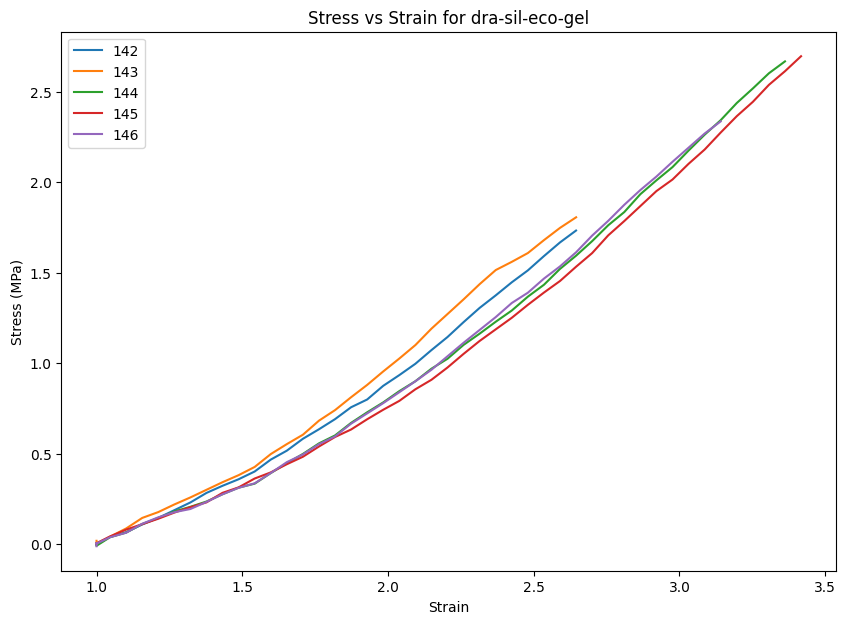

The mean Young's Modulus for material dra-sil-eco-gel is 1.2094851996018332 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-gel is 0.07302616671875924 MPa
The Young's Modulus for sample number 153 is 1.06266943103305 MPa
The Young's Modulus for sample number 154 is 1.5685403143385284 MPa
The Young's Modulus for sample number 155 is 0.9971550110748173 MPa
The Young's Modulus for sample number 156 is 1.1812175602602066 MPa
The Young's Modulus for sample number 157 is 1.5062991692798589 MPa
The Young's Modulus for sample number 158 is 1.1708792903336127 MPa


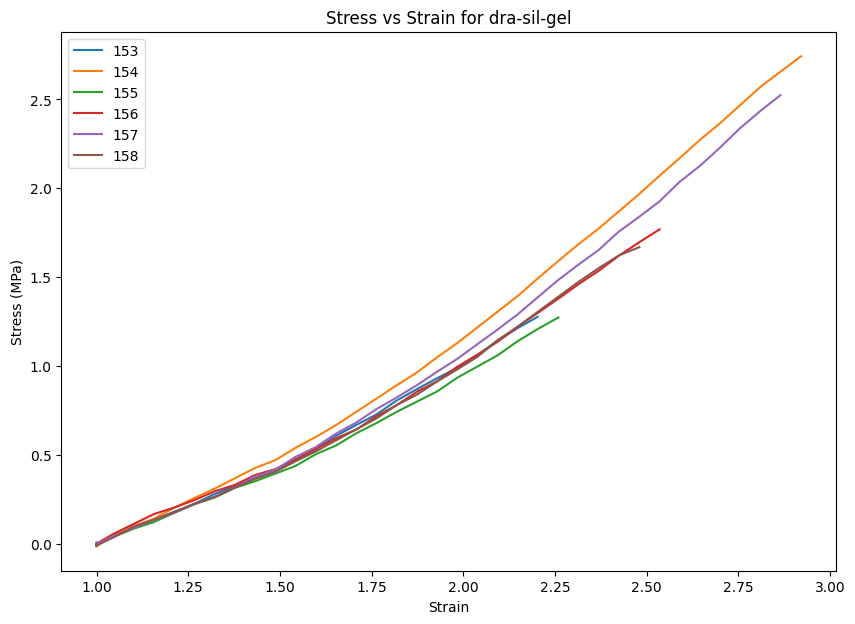

The mean Young's Modulus for material dra-sil-gel is 1.2477934627200122 MPa
The standard deviation of Young's Modulus for material dra-sil-gel is 0.214919529281913 MPa
The Young's Modulus for sample number 170 is 0.5662754370423956 MPa
The Young's Modulus for sample number 171 is 0.5784730219513742 MPa
The Young's Modulus for sample number 172 is 0.6394612074336121 MPa
The Young's Modulus for sample number 173 is 0.6127972492212368 MPa
The Young's Modulus for sample number 174 is 0.6897112144306564 MPa
The Young's Modulus for sample number 175 is 0.5902522649173964 MPa


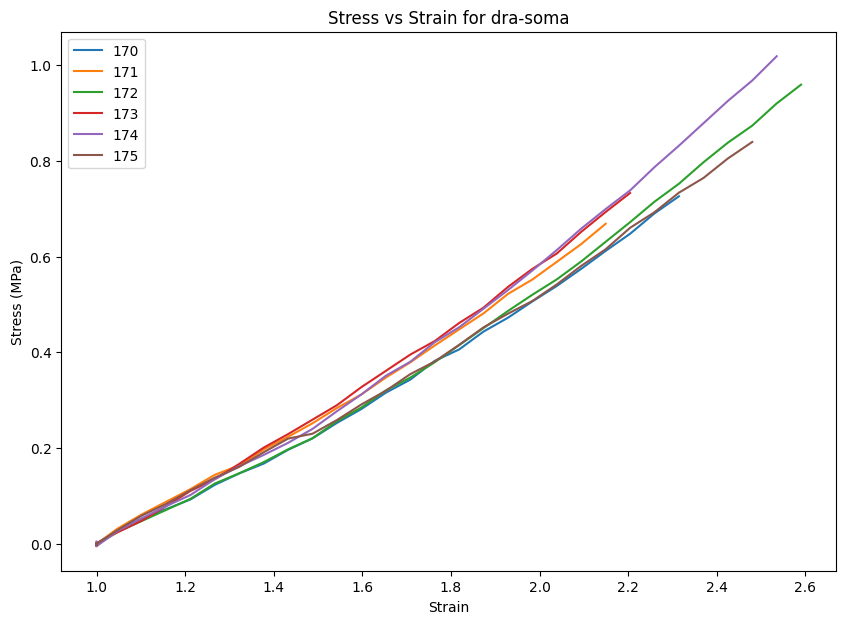

The mean Young's Modulus for material dra-soma is 0.6128283991661119 MPa
The standard deviation of Young's Modulus for material dra-soma is 0.04178801022863234 MPa
The Young's Modulus for sample number 238 is 1.9534907633593044 MPa
The Young's Modulus for sample number 239 is 2.0314362315024783 MPa
The Young's Modulus for sample number 240 is 1.650463343040925 MPa
The Young's Modulus for sample number 241 is 1.9041074973278367 MPa
The Young's Modulus for sample number 242 is 2.1222626913094187 MPa


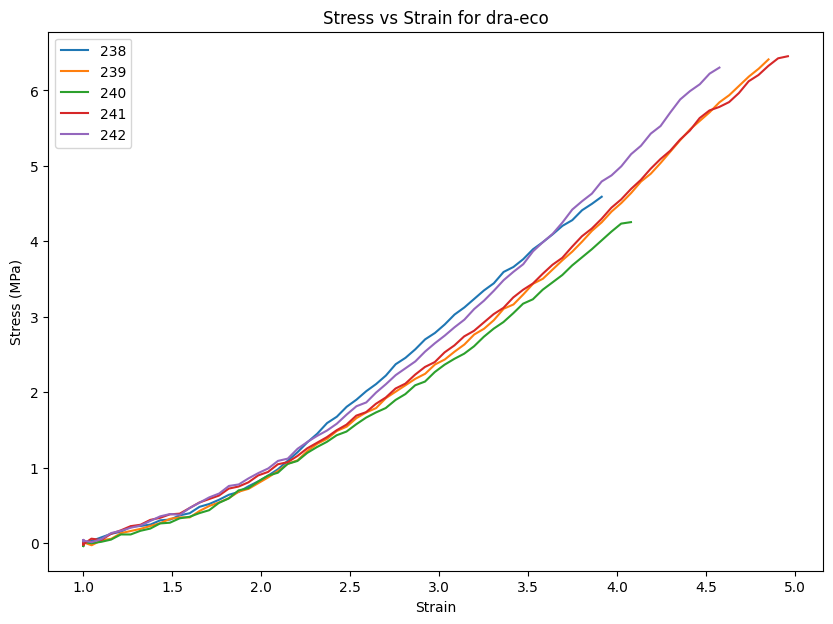

The mean Young's Modulus for material dra-eco is 1.9323521053079926 MPa
The standard deviation of Young's Modulus for material dra-eco is 0.15911603927684484 MPa
The Young's Modulus for sample number 120 is 0.3708039565683141 MPa
The Young's Modulus for sample number 121 is 0.2855768607352925 MPa
The Young's Modulus for sample number 122 is 0.282945028184418 MPa
The Young's Modulus for sample number 123 is 0.3244436780937661 MPa
The Young's Modulus for sample number 124 is 0.30275940045749217 MPa


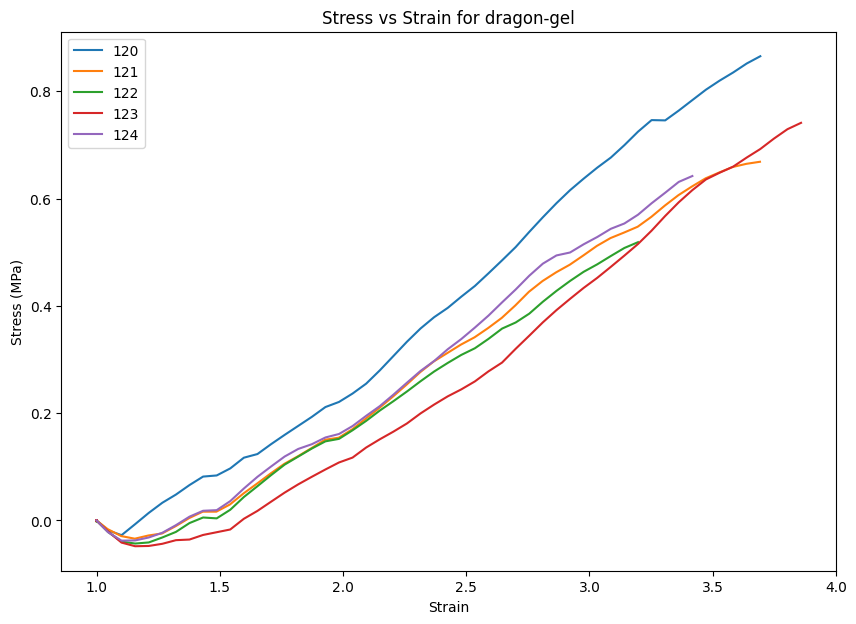

The mean Young's Modulus for material dragon-gel is 0.31330578480785654 MPa
The standard deviation of Young's Modulus for material dragon-gel is 0.03234806769647513 MPa
The Young's Modulus for sample number 135 is 1.4702679303913446 MPa
The Young's Modulus for sample number 136 is 1.377556793125045 MPa
The Young's Modulus for sample number 137 is 0.9852474599706182 MPa
The Young's Modulus for sample number 138 is 1.299522056365898 MPa
The Young's Modulus for sample number 139 is 1.5133914017696026 MPa


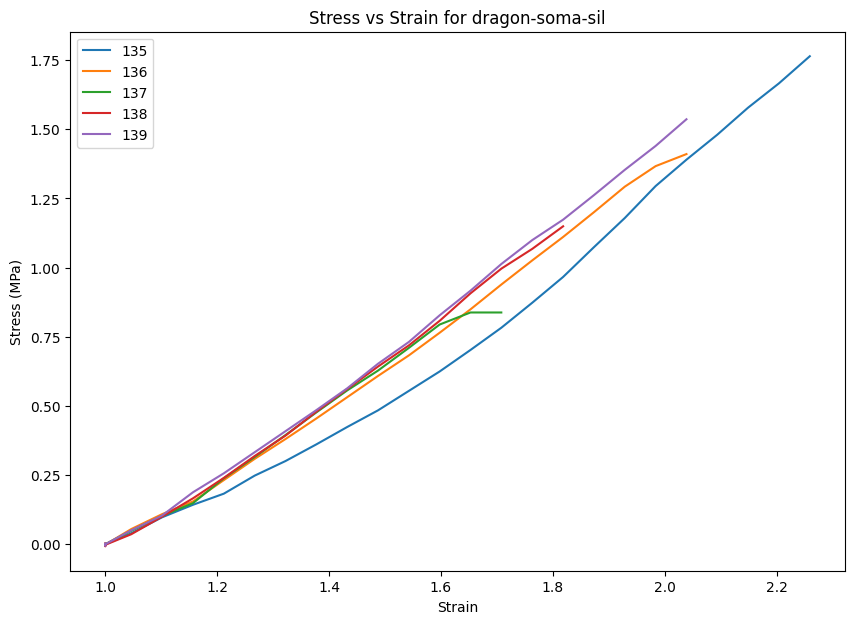

The mean Young's Modulus for material dragon-soma-sil is 1.3291971283245017 MPa
The standard deviation of Young's Modulus for material dragon-soma-sil is 0.18726940113209453 MPa
The Young's Modulus for sample number 159 is 0.9535433551298323 MPa
The Young's Modulus for sample number 160 is 0.7851647860520181 MPa
The Young's Modulus for sample number 161 is 0.8945503463271051 MPa
The Young's Modulus for sample number 162 is 0.7371631845933084 MPa
The Young's Modulus for sample number 163 is 0.8357215580184425 MPa


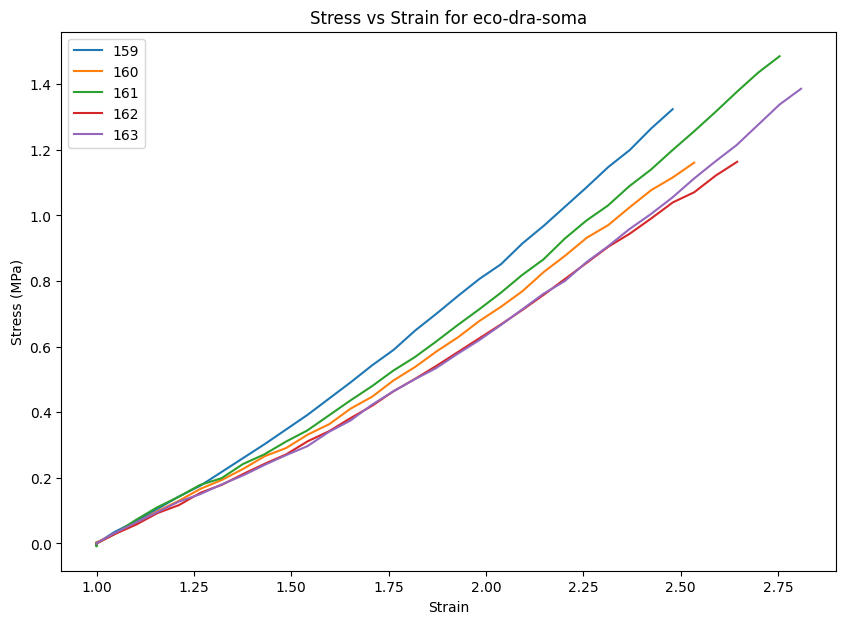

The mean Young's Modulus for material eco-dra-soma is 0.8412286460241413 MPa
The standard deviation of Young's Modulus for material eco-dra-soma is 0.07676053970730481 MPa
The Young's Modulus for sample number 108 is 0.33762594248348565 MPa
The Young's Modulus for sample number 109 is 0.3847348053169032 MPa
The Young's Modulus for sample number 110 is 0.4388028013792392 MPa
The Young's Modulus for sample number 111 is 0.3529242005127963 MPa
The Young's Modulus for sample number 112 is 0.45753951786320596 MPa
The Young's Modulus for sample number 113 is 0.3989229563915854 MPa
The Young's Modulus for sample number 114 is 0.4255874215273193 MPa


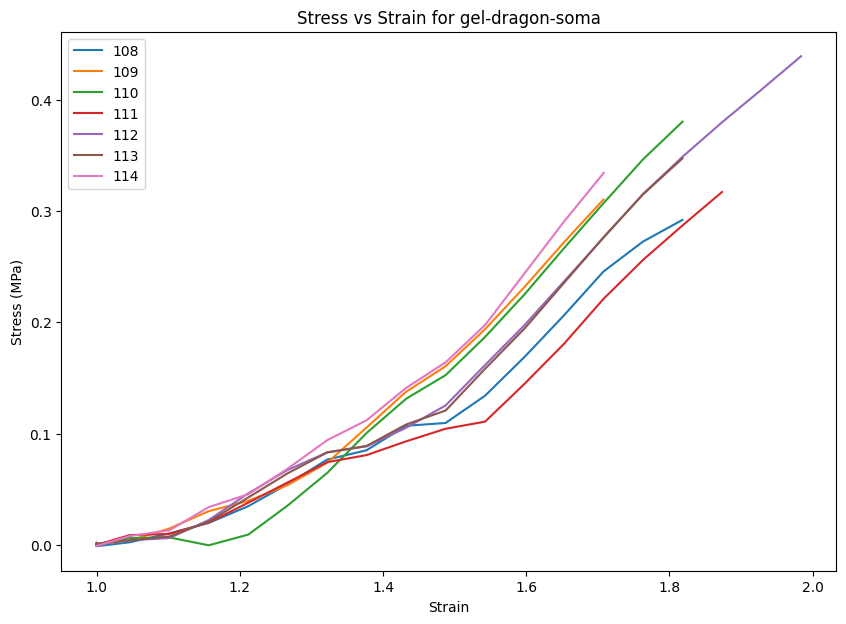

The mean Young's Modulus for material gel-dragon-soma is 0.39944823506779076 MPa
The standard deviation of Young's Modulus for material gel-dragon-soma is 0.04107463360330596 MPa
The Young's Modulus for sample number 125 is 0.2358720111533765 MPa
The Young's Modulus for sample number 126 is 0.2706151637917123 MPa
The Young's Modulus for sample number 127 is 0.20982510589107395 MPa
The Young's Modulus for sample number 128 is 0.24497480020902523 MPa
The Young's Modulus for sample number 129 is 0.26978312692598405 MPa


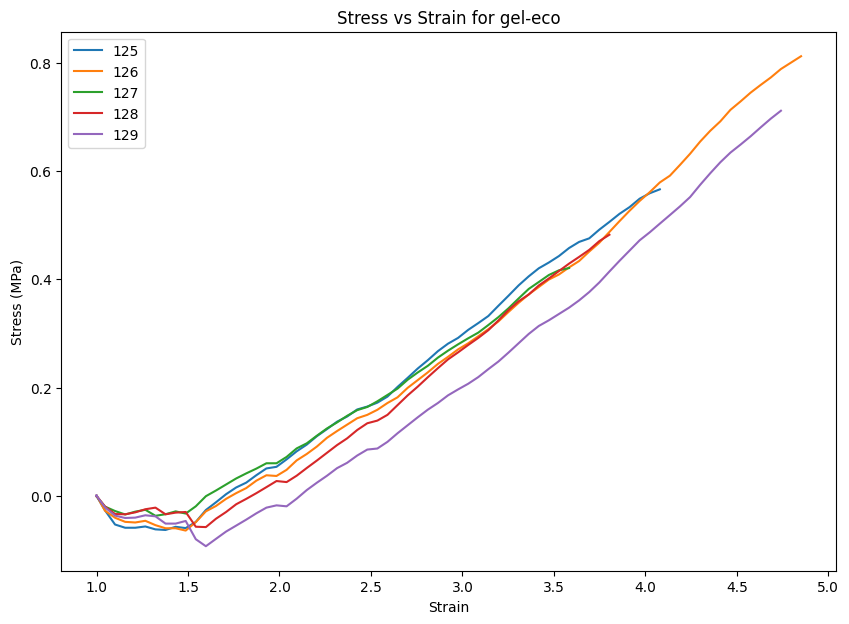

The mean Young's Modulus for material gel-eco is 0.24621404159423438 MPa
The standard deviation of Young's Modulus for material gel-eco is 0.022731319813555646 MPa
The Young's Modulus for sample number 130 is 0.0013333333333333333 MPa
The Young's Modulus for sample number 131 is 0.10600182000251299 MPa
The Young's Modulus for sample number 132 is 0.11376998392124858 MPa
The Young's Modulus for sample number 133 is 0.10420868629823854 MPa
The Young's Modulus for sample number 134 is 0.13064128890139712 MPa


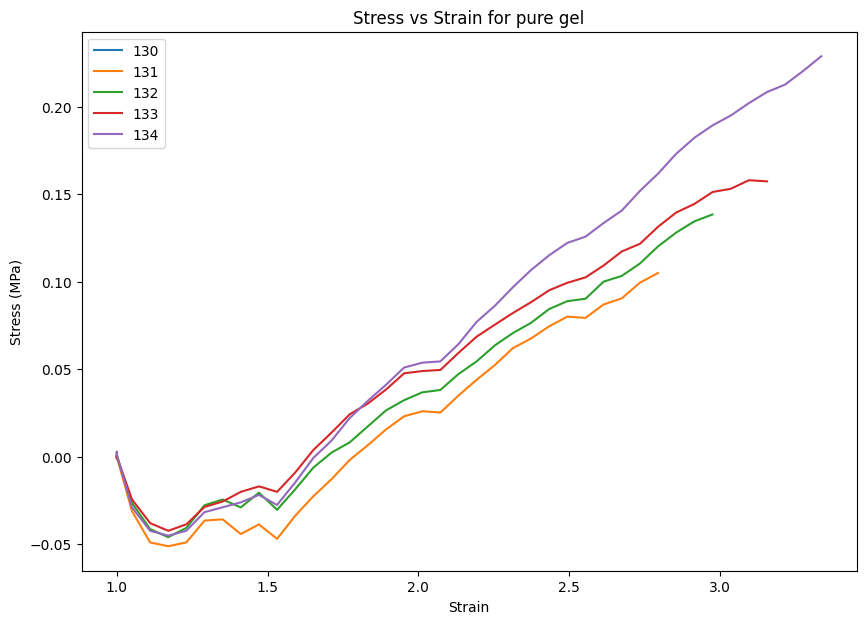

The mean Young's Modulus for material pure gel is 0.09119102249134611 MPa
The standard deviation of Young's Modulus for material pure gel is 0.045889773618533206 MPa
The Young's Modulus for sample number 087 is 2.302476180151648 MPa
The Young's Modulus for sample number 088 is 2.6646699187956253 MPa
The Young's Modulus for sample number 089 is 2.6649465103153798 MPa
The Young's Modulus for sample number 090 is 2.2452713966827726 MPa
The Young's Modulus for sample number 091 is 2.4402001596732026 MPa


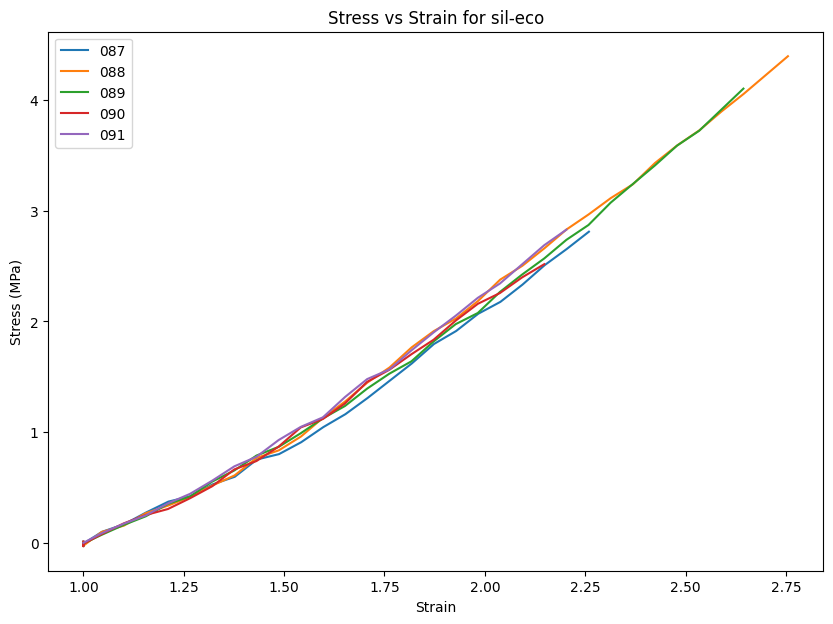

The mean Young's Modulus for material sil-eco is 2.4635128331237253 MPa
The standard deviation of Young's Modulus for material sil-eco is 0.176150678878416 MPa
The Young's Modulus for sample number 147 is 1.2055162723147828 MPa
The Young's Modulus for sample number 148 is 1.2767530051846048 MPa
The Young's Modulus for sample number 149 is 1.0464511860882715 MPa
The Young's Modulus for sample number 150 is 1.209211993140242 MPa
The Young's Modulus for sample number 151 is 0.8669392527043188 MPa
The Young's Modulus for sample number 152 is 1.0872603616664263 MPa


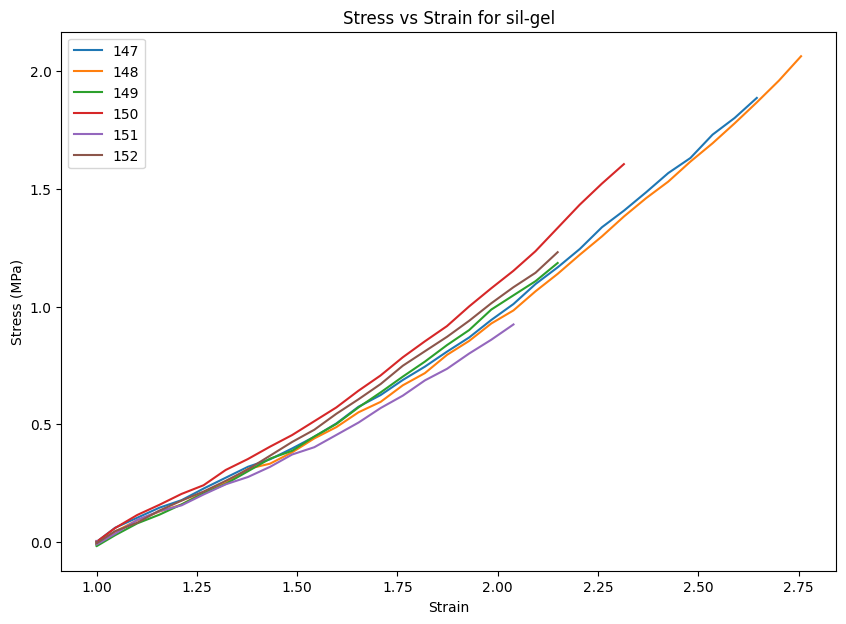

The mean Young's Modulus for material sil-gel is 1.1153553451831077 MPa
The standard deviation of Young's Modulus for material sil-gel is 0.13554515486407154 MPa
The Young's Modulus for sample number 164 is 1.1989786493168642 MPa
The Young's Modulus for sample number 165 is 1.1789659060147135 MPa
The Young's Modulus for sample number 166 is 1.2207077382264588 MPa
The Young's Modulus for sample number 167 is 1.2123677651281768 MPa
The Young's Modulus for sample number 168 is 1.102052102797865 MPa
The Young's Modulus for sample number 169 is 1.16243567897713 MPa


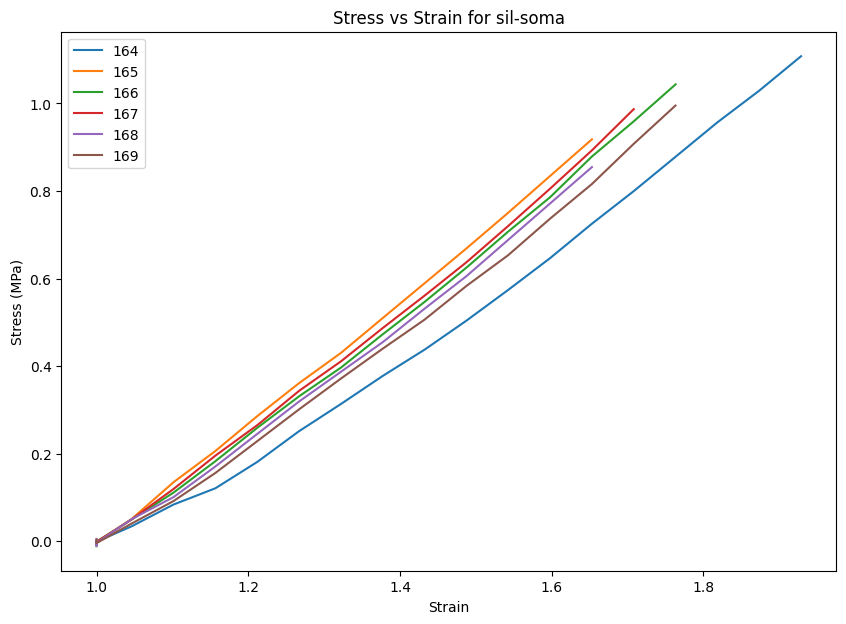

The mean Young's Modulus for material sil-soma is 1.1792513067435346 MPa
The standard deviation of Young's Modulus for material sil-soma is 0.03968011141794888 MPa
The Young's Modulus for sample number 115 is 0.2623457704389874 MPa
The Young's Modulus for sample number 116 is 0.3824089130905826 MPa
The Young's Modulus for sample number 117 is 0.39065058230899724 MPa
The Young's Modulus for sample number 118 is 0.39540082861382503 MPa
The Young's Modulus for sample number 119 is 0.3471557870452389 MPa


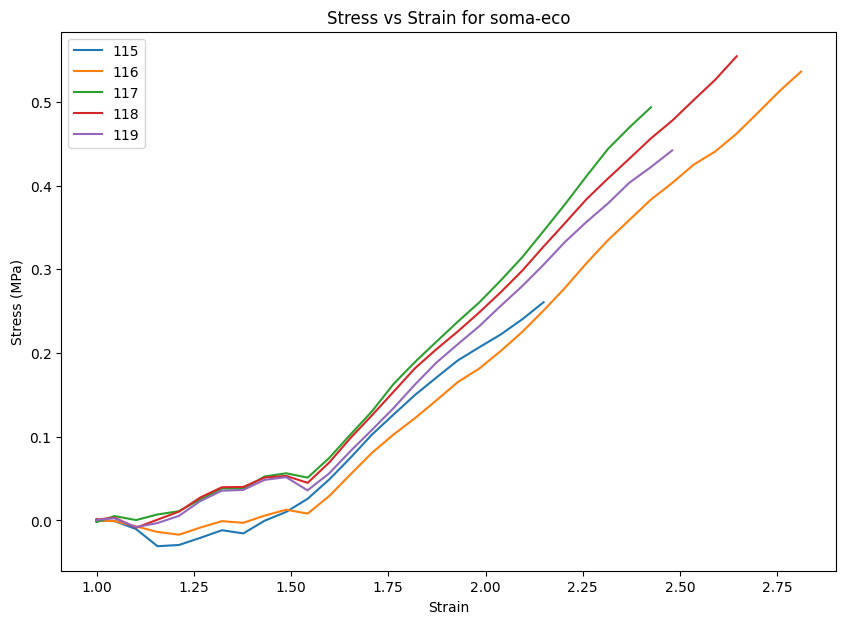

The mean Young's Modulus for material soma-eco is 0.3555923762995262 MPa
The standard deviation of Young's Modulus for material soma-eco is 0.04959641695220457 MPa
The Young's Modulus for sample number 176 is 0.24803428668479438 MPa
The Young's Modulus for sample number 177 is 0.2619165601717828 MPa
The Young's Modulus for sample number 178 is 0.2934550779007395 MPa
The Young's Modulus for sample number 179 is 0.28691682346496117 MPa
The Young's Modulus for sample number 180 is 0.2370395347180513 MPa
The Young's Modulus for sample number 181 is 0.20374273321916117 MPa


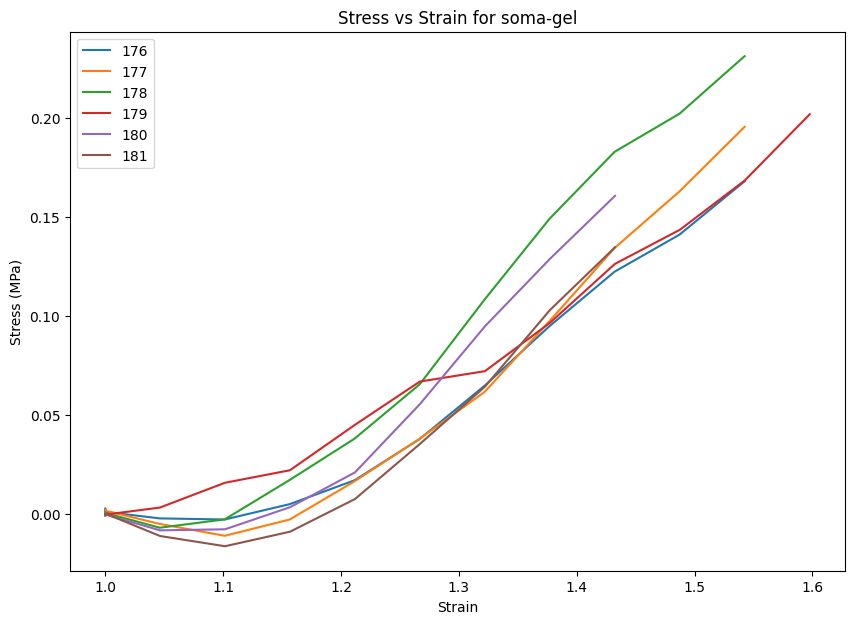

The mean Young's Modulus for material soma-gel is 0.2551841693599151 MPa
The standard deviation of Young's Modulus for material soma-gel is 0.030396049096092358 MPa
The Young's Modulus for sample number 182 is 0.4476070186269288 MPa
The Young's Modulus for sample number 183 is 0.44831435681927034 MPa
The Young's Modulus for sample number 184 is 0.4114187108363196 MPa
The Young's Modulus for sample number 185 is 0.5115640308197449 MPa
The Young's Modulus for sample number 186 is 0.5570677931988531 MPa


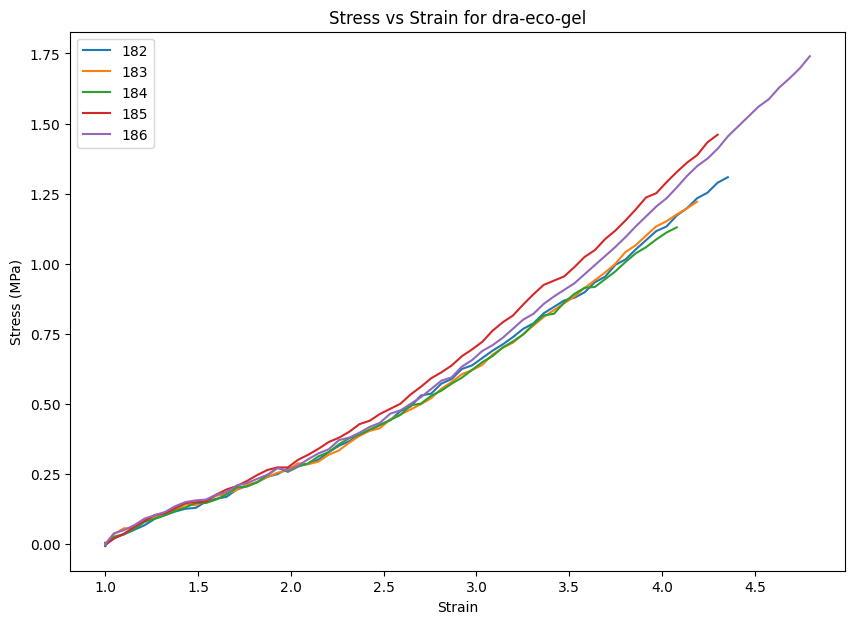

The mean Young's Modulus for material dra-eco-gel is 0.4751943820602234 MPa
The standard deviation of Young's Modulus for material dra-eco-gel is 0.052109387677424276 MPa
The Young's Modulus for sample number 187 is 0.9655453822023554 MPa
The Young's Modulus for sample number 188 is 1.0869592387785783 MPa
The Young's Modulus for sample number 189 is 0.9813788201847905 MPa
The Young's Modulus for sample number 190 is 0.988389590230149 MPa
The Young's Modulus for sample number 191 is 1.0473242561185605 MPa


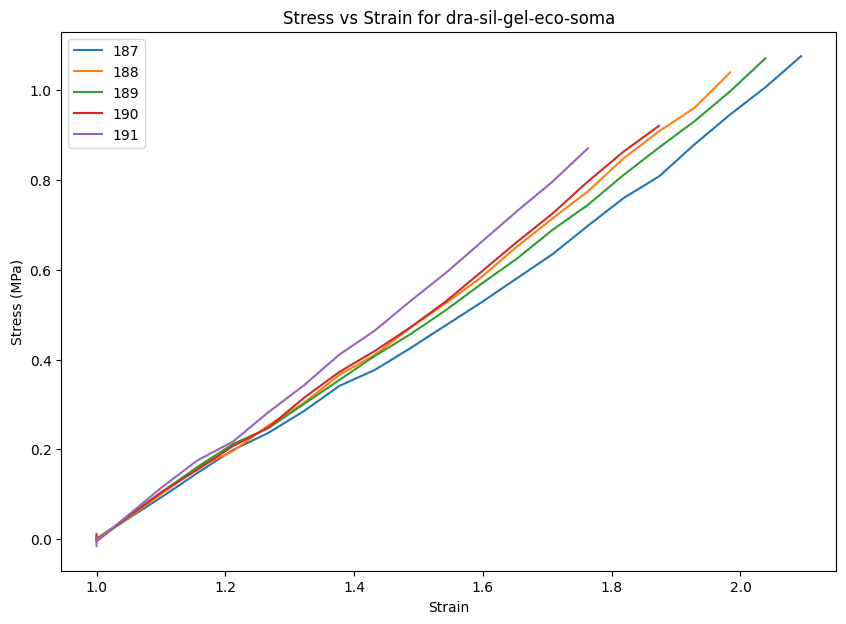

The mean Young's Modulus for material dra-sil-gel-eco-soma is 1.013919457502887 MPa
The standard deviation of Young's Modulus for material dra-sil-gel-eco-soma is 0.04582883062127493 MPa
The Young's Modulus for sample number 192 is 0.7137775038333198 MPa
The Young's Modulus for sample number 193 is 0.8608745484589587 MPa
The Young's Modulus for sample number 194 is 0.8755727461395688 MPa
The Young's Modulus for sample number 195 is 0.8141416849479308 MPa
The Young's Modulus for sample number 196 is 0.7943600436898024 MPa


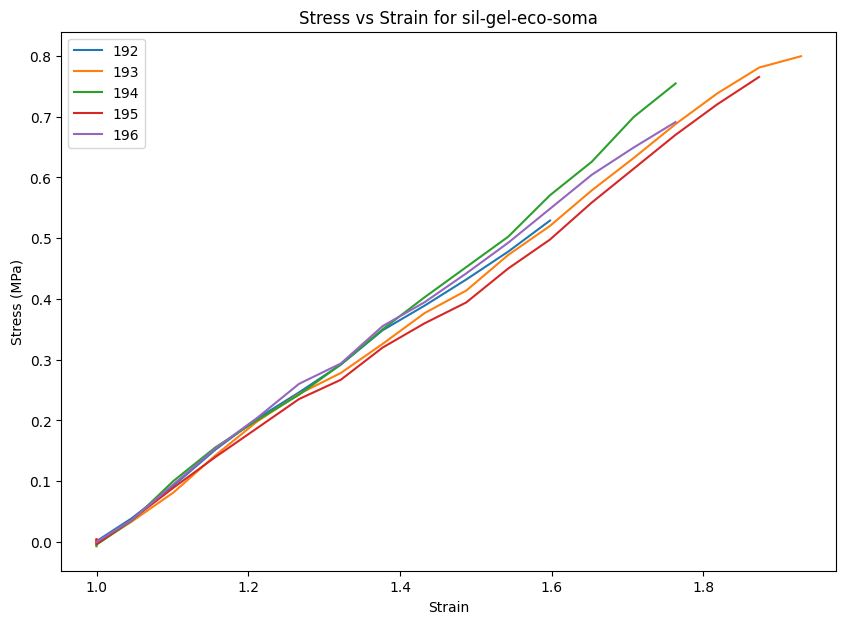

The mean Young's Modulus for material sil-gel-eco-soma is 0.811745305413916 MPa
The standard deviation of Young's Modulus for material sil-gel-eco-soma is 0.05725959276555787 MPa
The Young's Modulus for sample number 197 is 0.6205114423335334 MPa
The Young's Modulus for sample number 198 is 0.6618160025096099 MPa
The Young's Modulus for sample number 199 is 0.6743945560529486 MPa
The Young's Modulus for sample number 200 is 0.5464499231274852 MPa
The Young's Modulus for sample number 201 is 0.5470262824098006 MPa


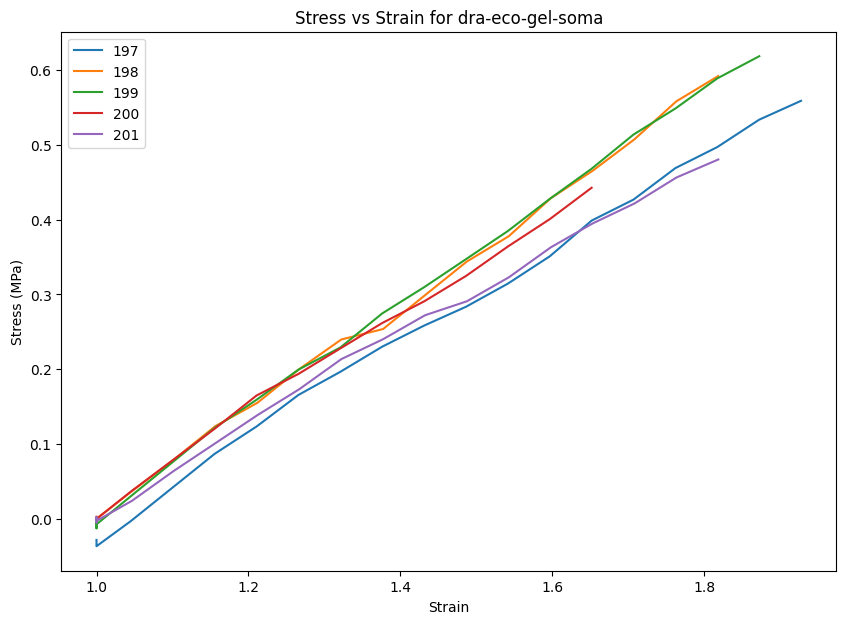

The mean Young's Modulus for material dra-eco-gel-soma is 0.6100396412866755 MPa
The standard deviation of Young's Modulus for material dra-eco-gel-soma is 0.05467420032472013 MPa
The Young's Modulus for sample number 202 is 0.4741062961517517 MPa
The Young's Modulus for sample number 203 is 0.49555926574954345 MPa
The Young's Modulus for sample number 204 is 0.4333572017786762 MPa
The Young's Modulus for sample number 205 is 0.408619881932363 MPa
The Young's Modulus for sample number 206 is 0.49882935232249215 MPa


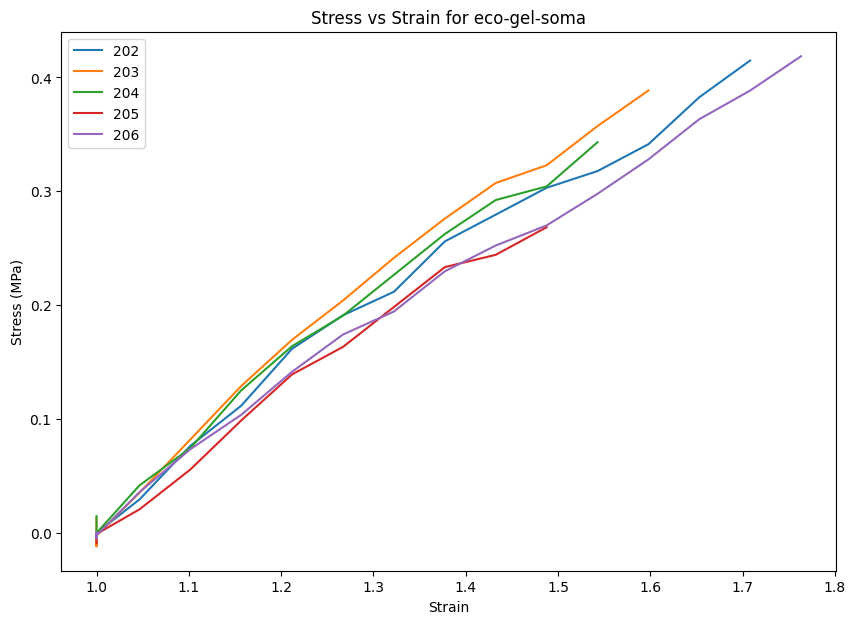

The mean Young's Modulus for material eco-gel-soma is 0.4620943995869653 MPa
The standard deviation of Young's Modulus for material eco-gel-soma is 0.03549363395063655 MPa
The Young's Modulus for sample number 207 is 1.0484890915196738 MPa
The Young's Modulus for sample number 208 is 1.0380094410984944 MPa
The Young's Modulus for sample number 209 is 1.0323327636621618 MPa
The Young's Modulus for sample number 210 is 1.0386351946699697 MPa
The Young's Modulus for sample number 211 is 1.0390930142647687 MPa


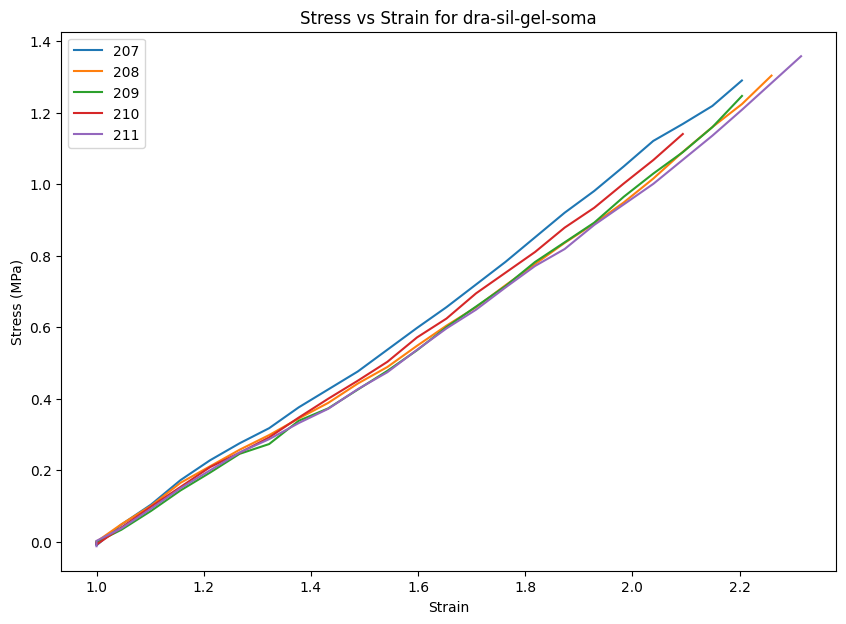

The mean Young's Modulus for material dra-sil-gel-soma is 1.0393119010430136 MPa
The standard deviation of Young's Modulus for material dra-sil-gel-soma is 0.005198681149479987 MPa
The Young's Modulus for sample number 212 is 1.2052663848462355 MPa
The Young's Modulus for sample number 213 is 1.0868946561358945 MPa
The Young's Modulus for sample number 214 is 1.0470632886523898 MPa
The Young's Modulus for sample number 215 is 1.1000895718266324 MPa
The Young's Modulus for sample number 216 is 1.0944092602463216 MPa


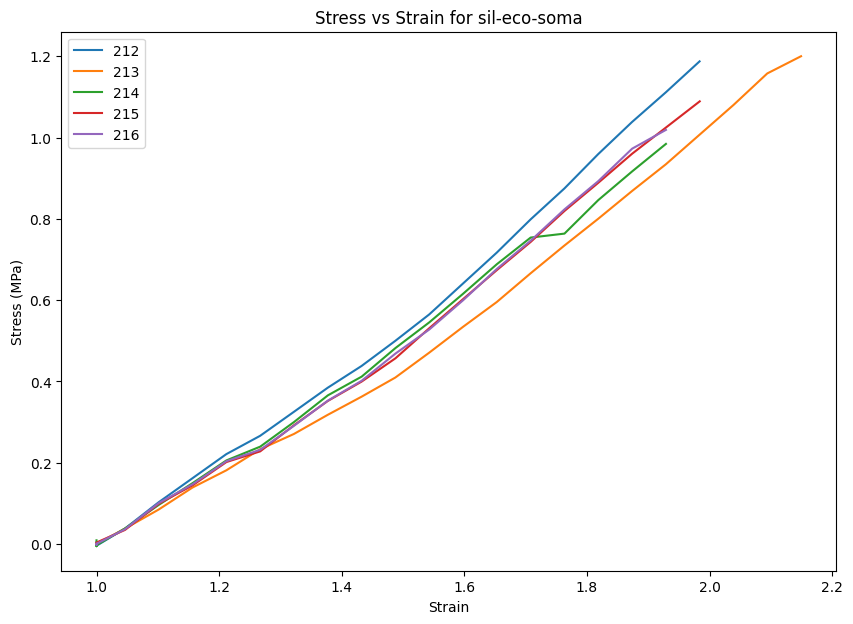

The mean Young's Modulus for material sil-eco-soma is 1.1067446323414944 MPa
The standard deviation of Young's Modulus for material sil-eco-soma is 0.05264764247654059 MPa
The Young's Modulus for sample number 217 is 1.2605514831228122 MPa
The Young's Modulus for sample number 218 is 1.2471056006361685 MPa
The Young's Modulus for sample number 219 is 1.409322964450885 MPa
The Young's Modulus for sample number 220 is 1.2250081075906585 MPa
The Young's Modulus for sample number 221 is 1.264895911461881 MPa


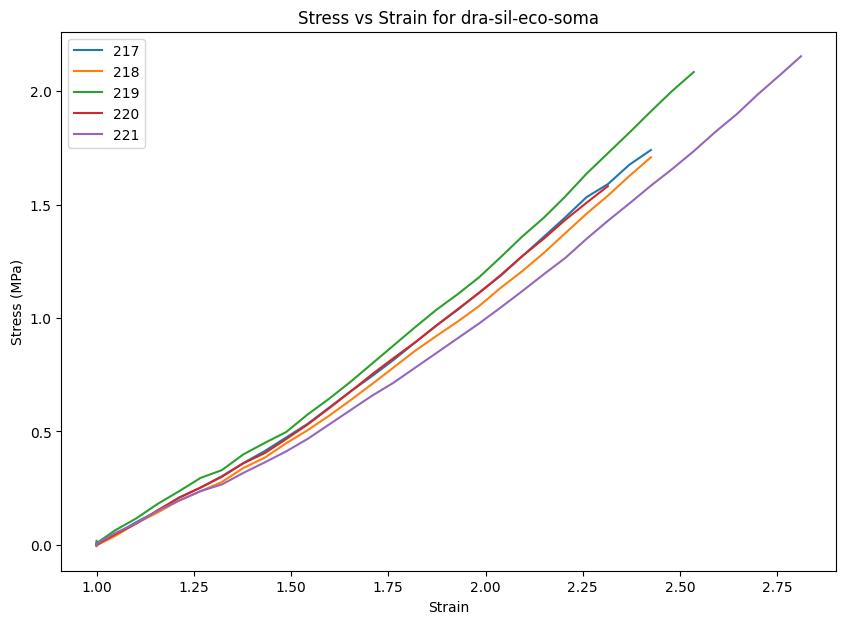

The mean Young's Modulus for material dra-sil-eco-soma is 1.281376813452481 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-soma is 0.06546369848627193 MPa
The Young's Modulus for sample number 222 is 0.6182555895464381 MPa
The Young's Modulus for sample number 223 is 0.8848200294743293 MPa
The Young's Modulus for sample number 224 is 0.6847743084887671 MPa
The Young's Modulus for sample number 225 is 0.7451110493423115 MPa
The Young's Modulus for sample number 226 is 0.7537950265096304 MPa


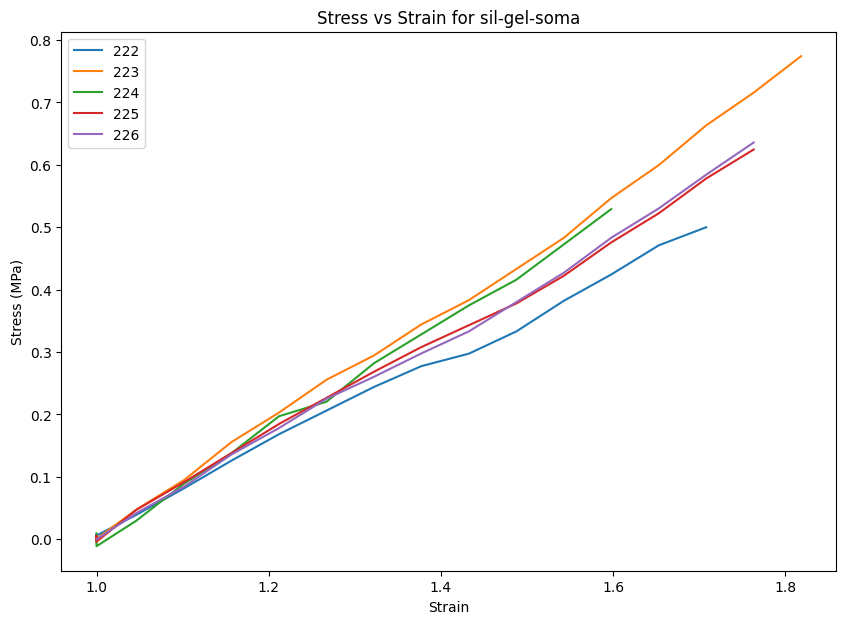

The mean Young's Modulus for material sil-gel-soma is 0.7373512006722953 MPa
The standard deviation of Young's Modulus for material sil-gel-soma is 0.08834677618217147 MPa
The Young's Modulus for sample number 243 is 2.518217098125893 MPa
The Young's Modulus for sample number 244 is 2.663704528499824 MPa
The Young's Modulus for sample number 245 is 2.4777131021001564 MPa
The Young's Modulus for sample number 246 is 2.7697485876231784 MPa
The Young's Modulus for sample number 247 is 2.3453911906576903 MPa
The Young's Modulus for sample number 248 is 3.0106355200257093 MPa


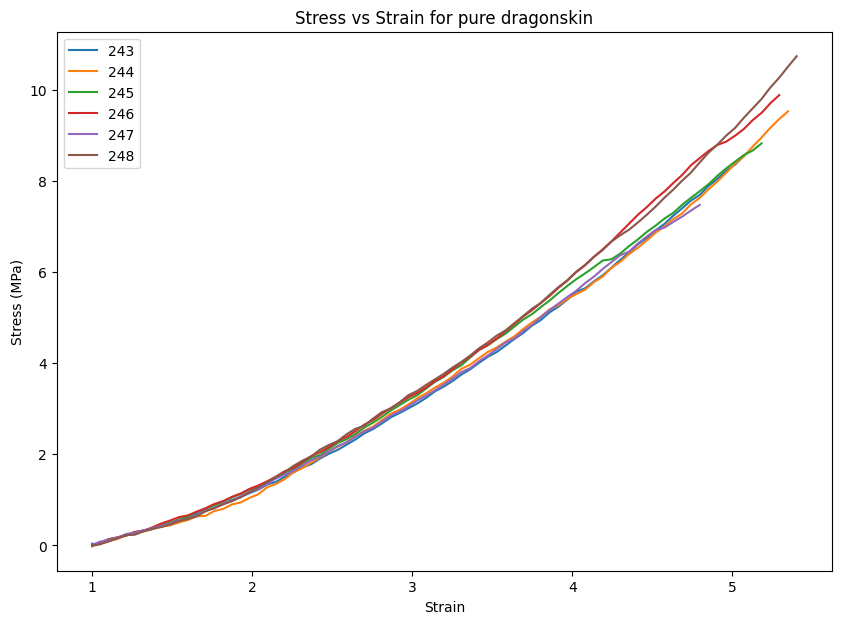

The mean Young's Modulus for material pure dragonskin is 2.6309016711720754 MPa
The standard deviation of Young's Modulus for material pure dragonskin is 0.21688440654047964 MPa
The Young's Modulus for sample number 232 is 1.3015435494936276 MPa
The Young's Modulus for sample number 233 is 1.1484381720316383 MPa
The Young's Modulus for sample number 234 is 1.172258676282945 MPa
The Young's Modulus for sample number 235 is 1.4041845243188835 MPa
The Young's Modulus for sample number 236 is 1.3197548960025989 MPa


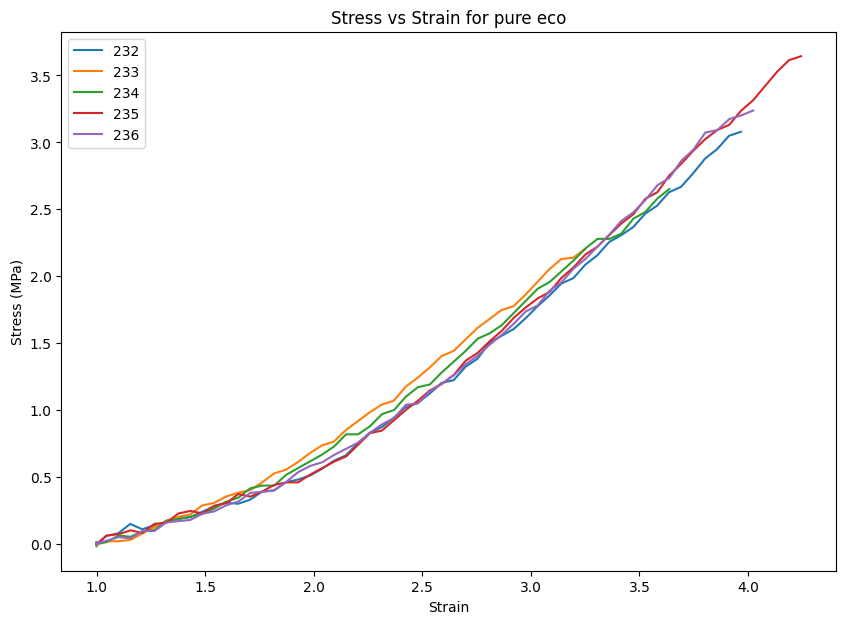

The mean Young's Modulus for material pure eco is 1.2692359636259387 MPa
The standard deviation of Young's Modulus for material pure eco is 0.0957118147154662 MPa
The Young's Modulus for sample number 227 is 3.8887412143635434 MPa
The Young's Modulus for sample number 228 is 3.644005889132316 MPa
The Young's Modulus for sample number 229 is 3.9881097312106 MPa
The Young's Modulus for sample number 230 is 4.5774259160478925 MPa
The Young's Modulus for sample number 231 is 4.0709169418753035 MPa


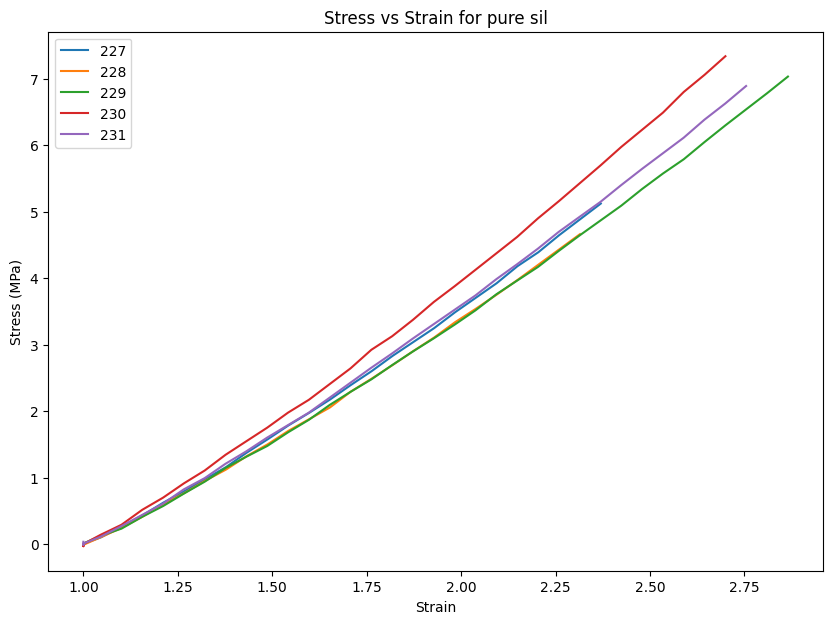

The mean Young's Modulus for material pure sil is 4.033839938525931 MPa
The standard deviation of Young's Modulus for material pure sil is 0.30723798489677506 MPa
The Young's Modulus for sample number 097 is 0.04100935789824025 MPa
The Young's Modulus for sample number 098 is 0.0315183763822007 MPa
The Young's Modulus for sample number 099 is 0.03201188739938055 MPa
The Young's Modulus for sample number 100 is 0.03485778310690669 MPa
The Young's Modulus for sample number 101 is 0.054084652832813086 MPa
The Young's Modulus for sample number 102 is 0.0552889797832718 MPa
The Young's Modulus for sample number 103 is 0.1119074966472668 MPa
The Young's Modulus for sample number 104 is 0.2026575817771274 MPa
The Young's Modulus for sample number 105 is 0.09791606589213595 MPa
The Young's Modulus for sample number 106 is 0.05550773163969494 MPa


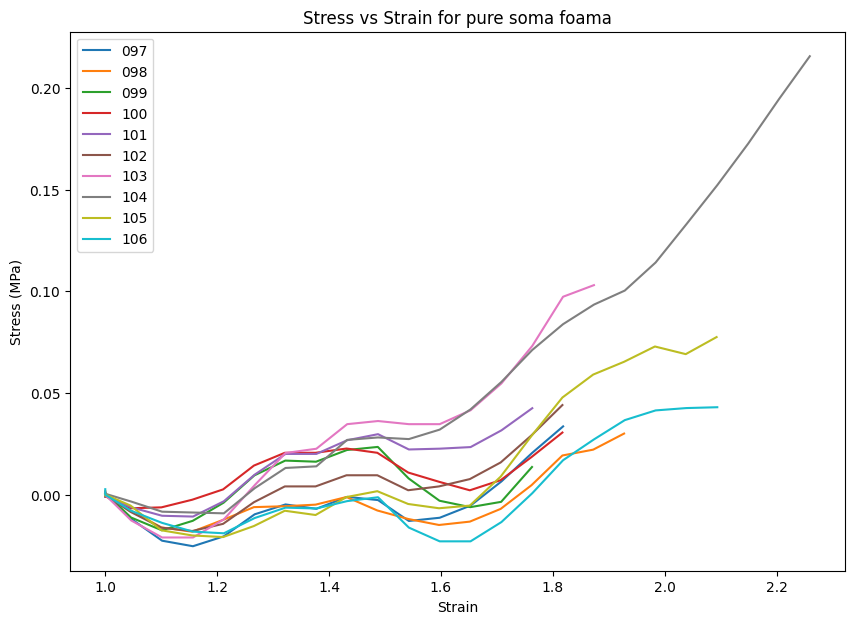

The mean Young's Modulus for material pure soma foama is 0.07167599133590381 MPa
The standard deviation of Young's Modulus for material pure soma foama is 0.050778531457554746 MPa
The Young's Modulus for sample number 076 is 3.4124181294643723 MPa
The Young's Modulus for sample number 077 is 2.7191194588286534 MPa
The Young's Modulus for sample number 078 is 3.4404508791468396 MPa
The Young's Modulus for sample number 079 is 3.0852536189779594 MPa
The Young's Modulus for sample number 080 is 2.882629840576318 MPa


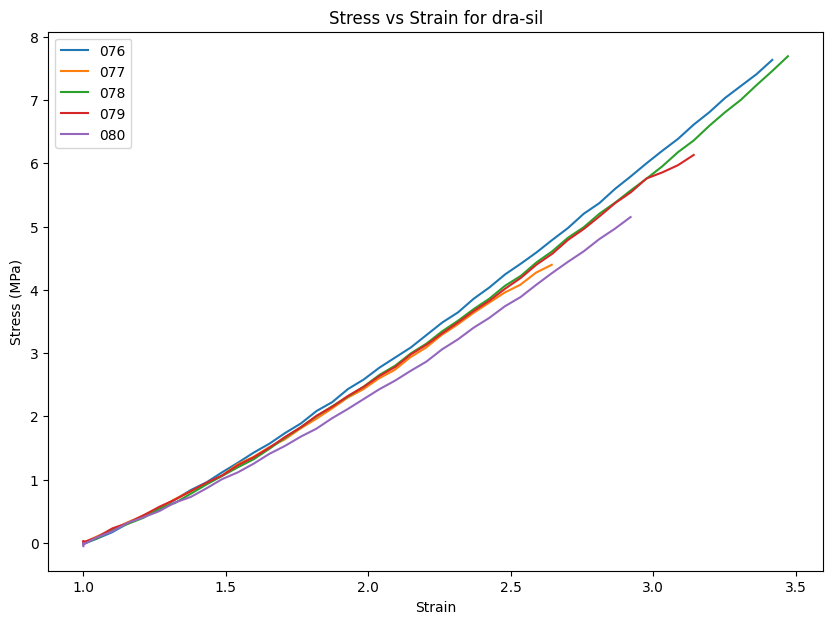

The mean Young's Modulus for material dra-sil is 3.1079743853988284 MPa
The standard deviation of Young's Modulus for material dra-sil is 0.28486177813863695 MPa
The Young's Modulus for sample number 092 is 2.6882311269538337 MPa
The Young's Modulus for sample number 093 is 2.5293230481120155 MPa
The Young's Modulus for sample number 094 is 2.5797990606825896 MPa
The Young's Modulus for sample number 095 is 2.2025944386772642 MPa
The Young's Modulus for sample number 096 is 2.446588109498682 MPa


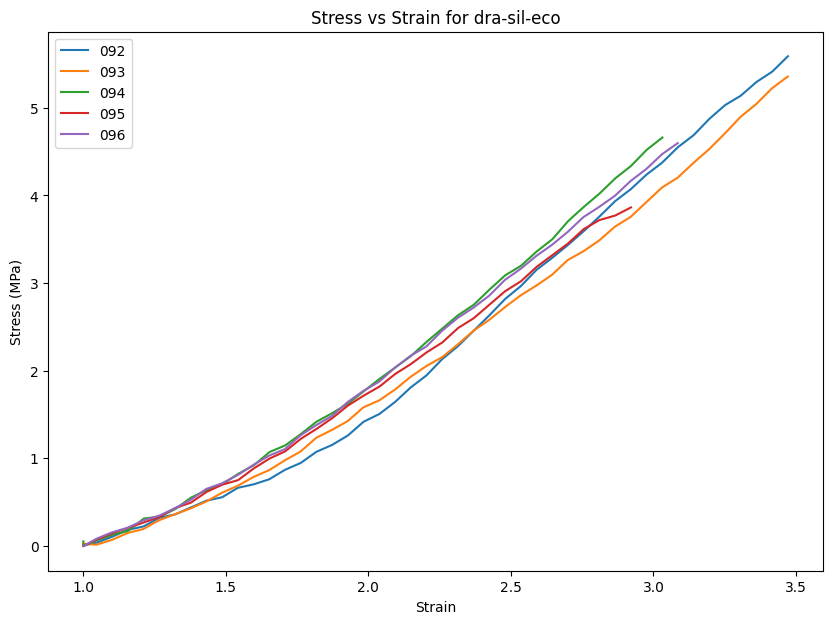

The mean Young's Modulus for material dra-sil-eco is 2.4893071567848772 MPa
The standard deviation of Young's Modulus for material dra-sil-eco is 0.16333395352051808 MPa
The Young's Modulus for sample number 081 is 1.0176535663792035 MPa
The Young's Modulus for sample number 082 is 0.9703237870231586 MPa
The Young's Modulus for sample number 083 is 0.8262668469852166 MPa
The Young's Modulus for sample number 084 is 0.8210606155610802 MPa
The Young's Modulus for sample number 085 is 0.8759722522407809 MPa


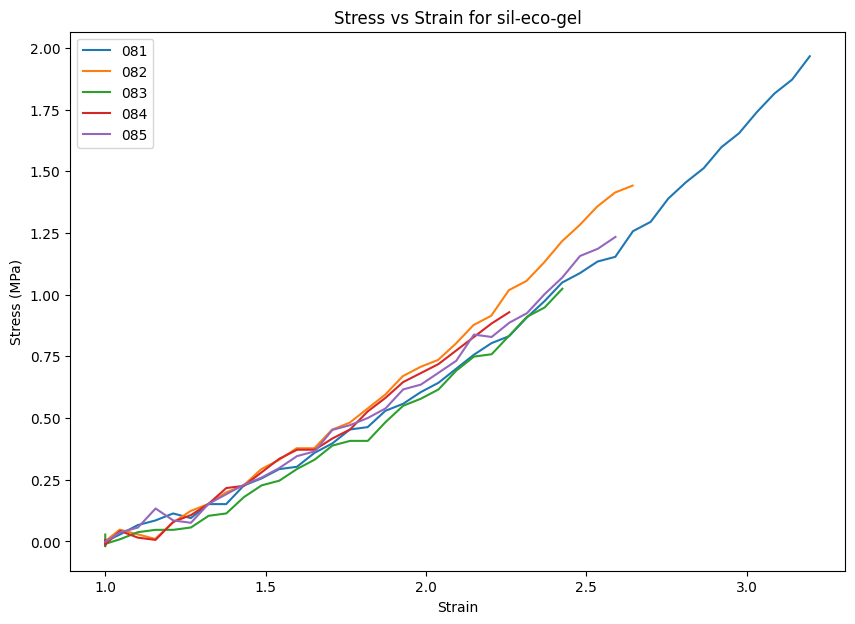

The mean Young's Modulus for material sil-eco-gel is 0.902255413637888 MPa
The standard deviation of Young's Modulus for material sil-eco-gel is 0.07874985610286794 MPa


In [27]:
# Call the function with specific material names and the lookup table
dra_sil_eco_gel_data, dra_sil_eco_gel_mean, dra_sil_eco_gel_std = process_and_plot_dataframes('dra-sil-eco-gel', lookup_table, thickness_df)
dra_sil_gel_data, dra_sil_gel_mean, dra_sil_gel_std = process_and_plot_dataframes('dra-sil-gel', lookup_table, thickness_df)
dra_soma_data, dra_soma_mean, dra_soma_std = process_and_plot_dataframes('dra-soma', lookup_table, thickness_df)
dra_eco_data, dra_eco_mean, dra_eco_std = process_and_plot_dataframes('dra-eco', lookup_table, thickness_df)
dragon_gel_data, dragon_gel_mean, dragon_gel_std = process_and_plot_dataframes('dragon-gel', lookup_table, thickness_df)
dragon_soma_sil_data, dragon_soma_sil_mean, dragon_soma_sil_std = process_and_plot_dataframes('dragon-soma-sil', lookup_table, thickness_df)
eco_dra_soma_data, eco_dra_soma_mean, eco_dra_soma_std = process_and_plot_dataframes('eco-dra-soma', lookup_table, thickness_df)
gel_dragon_soma_data, gel_dragon_soma_mean, gel_dragon_soma_std = process_and_plot_dataframes('gel-dragon-soma', lookup_table, thickness_df)
gel_eco_data, gel_eco_mean, gel_eco_std = process_and_plot_dataframes('gel-eco', lookup_table, thickness_df)
pure_gel_data, pure_gel_mean, pure_gel_std = process_and_plot_dataframes('pure gel', lookup_table, thickness_df)
sil_eco_data, sil_eco_mean, sil_eco_std = process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)
sil_gel_data, sil_gel_mean, sil_gel_std = process_and_plot_dataframes('sil-gel', lookup_table, thickness_df)
sil_soma_data, sil_soma_mean, sil_soma_std = process_and_plot_dataframes('sil-soma', lookup_table, thickness_df)
soma_eco_data, soma_eco_mean, soma_eco_std = process_and_plot_dataframes('soma-eco', lookup_table, thickness_df)
soma_gel_data, soma_gel_mean, soma_gel_std = process_and_plot_dataframes('soma-gel', lookup_table, thickness_df)
dra_eco_gel_data, dra_eco_gel_mean, dra_eco_gel_std = process_and_plot_dataframes('dra-eco-gel', lookup_table, thickness_df)
dra_sil_gel_eco_soma_data, dra_sil_gel_eco_soma_mean, dra_sil_gel_eco_soma_std = process_and_plot_dataframes('dra-sil-gel-eco-soma', lookup_table, thickness_df)
sil_gel_eco_soma_data, sil_gel_eco_soma_mean, sil_gel_eco_soma_std = process_and_plot_dataframes('sil-gel-eco-soma', lookup_table, thickness_df)
dra_eco_gel_soma_data, dra_eco_gel_soma_mean, dra_eco_gel_soma_std = process_and_plot_dataframes('dra-eco-gel-soma', lookup_table, thickness_df)
eco_gel_soma_data, eco_gel_soma_mean, eco_gel_soma_std = process_and_plot_dataframes('eco-gel-soma', lookup_table, thickness_df)
dra_sil_gel_soma_data, dra_sil_gel_soma_mean, dra_sil_gel_soma_std = process_and_plot_dataframes('dra-sil-gel-soma', lookup_table, thickness_df)
sil_eco_soma_data, sil_eco_soma_mean, sil_eco_soma_std = process_and_plot_dataframes('sil-eco-soma', lookup_table, thickness_df)
dra_sil_eco_soma_data, dra_sil_eco_soma_mean, dra_sil_eco_soma_std = process_and_plot_dataframes('dra-sil-eco-soma', lookup_table, thickness_df)
sil_gel_soma_data, sil_gel_soma_mean, sil_gel_soma_std = process_and_plot_dataframes('sil-gel-soma', lookup_table, thickness_df)
pure_dragon_data, pure_dragon_mean, pure_dragon_std = process_and_plot_dataframes('pure dragonskin', lookup_table, thickness_df)
pure_eco_data, pure_eco_mean, pure_eco_std = process_and_plot_dataframes('pure eco', lookup_table, thickness_df)
pure_sil_data, pure_sil_mean, pure_sil_std = process_and_plot_dataframes('pure sil', lookup_table, thickness_df)
pure_soma_foama_data, pure_soma_foama_mean, pure_soma_foama_std = process_and_plot_dataframes('pure soma foama', lookup_table, thickness_df)
dra_sil_data, dra_sil_mean, dra_sil_std = process_and_plot_dataframes('dra-sil', lookup_table, thickness_df)
dra_sil_eco_data, dra_sil_eco_mean, dra_sil_eco_std = process_and_plot_dataframes('dra-sil-eco', lookup_table, thickness_df)
sil_eco_gel_data, sil_eco_gel_mean, sil_eco_gel_std = process_and_plot_dataframes('sil-eco-gel', lookup_table, thickness_df)


# process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)

Text(0.5, 1.0, 'Stress')

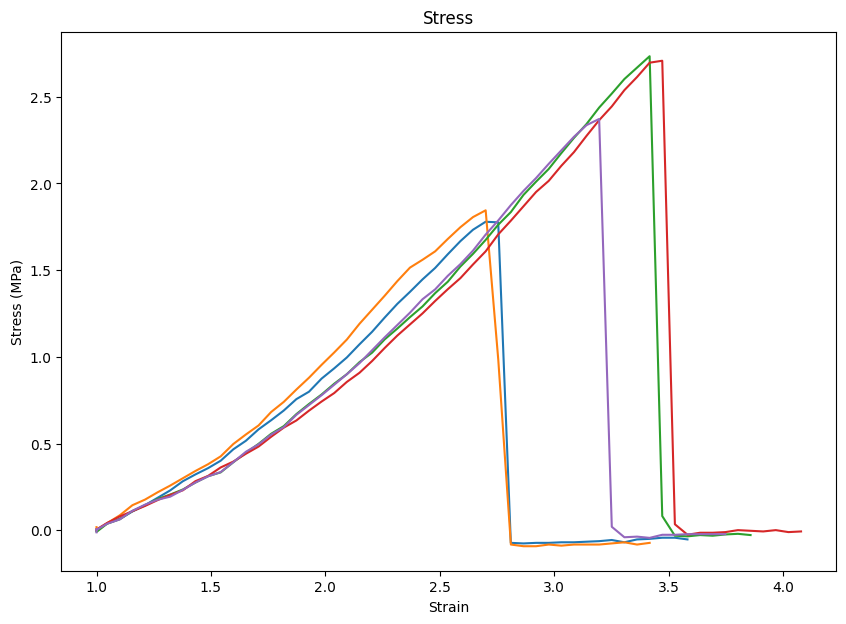

In [28]:
#plot one random sample for all 31 materials to compare stress strain up to the max stress point
fig_force_displacement = plt.figure(figsize=(10, 7))

ax_force_displacement = fig_force_displacement.add_subplot(111)

for sample_number in dra_sil_eco_gel_data.keys():
    stress = dra_sil_eco_gel_data[sample_number]["stress"]
    strain = dra_sil_eco_gel_data[sample_number]["strain"]
    ax_force_displacement.plot(strain, stress, label=sample_number)

ax_force_displacement.set_xlabel('Strain')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title('Stress')

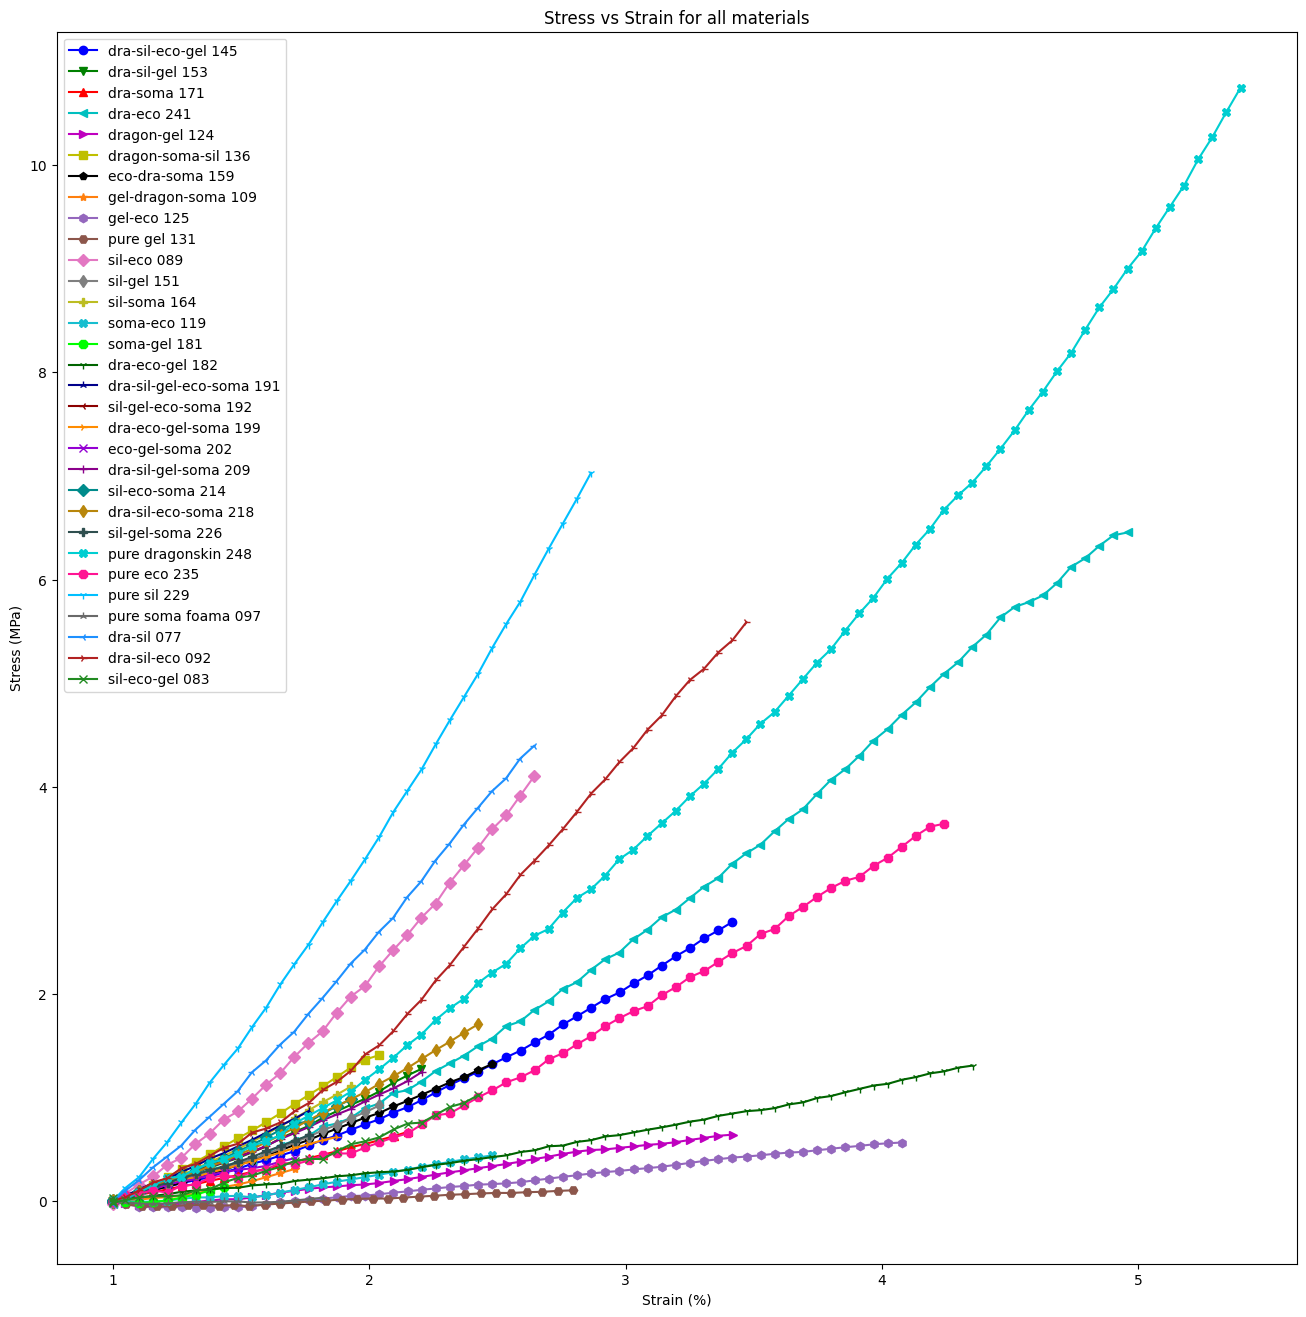

In [29]:
#create markers and colors for all 31 materials, besides white
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lime', 'darkgreen', 'darkblue', 'darkred', 'darkorange', 'darkviolet', 'darkmagenta', 'darkcyan', 'darkgoldenrod', 'darkslategray', 'darkturquoise', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'forestgreen']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+']

#create dictionary and labels of all 31 materials
dictionaries = [dra_sil_eco_gel_data, dra_sil_gel_data, dra_soma_data, dra_eco_data, dragon_gel_data, dragon_soma_sil_data, eco_dra_soma_data, gel_dragon_soma_data, gel_eco_data, pure_gel_data, sil_eco_data, sil_gel_data, sil_soma_data, soma_eco_data, soma_gel_data, dra_eco_gel_data, dra_sil_gel_eco_soma_data, sil_gel_eco_soma_data, dra_eco_gel_soma_data, eco_gel_soma_data, dra_sil_gel_soma_data, sil_eco_soma_data, dra_sil_eco_soma_data, sil_gel_soma_data, pure_dragon_data, pure_eco_data, pure_sil_data, pure_soma_foama_data, dra_sil_data, dra_sil_eco_data, sil_eco_gel_data]
labels = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

#import random
import random

# Plot a random sample from each material, up to each global maximum stress
fig_force_displacement = plt.figure(figsize=(16, 16))
ax_force_displacement = fig_force_displacement.add_subplot(111)

for data, label, marker, color in zip(dictionaries, labels, markers, colors):
    sample_number = random.choice(list(data.keys()))
    max_stress_index = np.argmax(data[sample_number]['stress'])
    ax_force_displacement.plot(data[sample_number]['strain'][:max_stress_index], data[sample_number]['stress'][:max_stress_index], marker=marker, linestyle='-', color=color, label=f'{label} {sample_number}')

ax_force_displacement.set_xlabel('Strain (%)')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title(f'Stress vs Strain for all materials')
ax_force_displacement.legend()

plt.show()

#save figure
fig_force_displacement.savefig('stress_strain_all_materials.png', dpi=300)

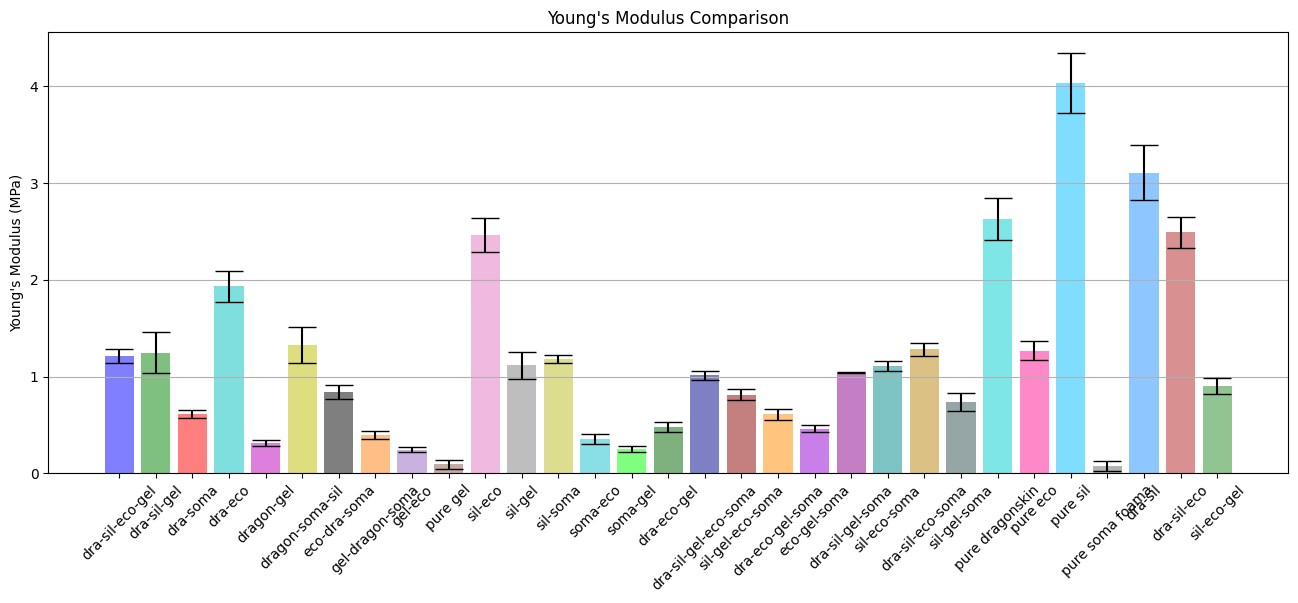

In [30]:
#do the same for all materials, with the bars more spread out
#list all materials
materials = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

x_pos = np.arange(len(materials))
CTEs = [dra_sil_eco_gel_mean, dra_sil_gel_mean, dra_soma_mean, dra_eco_mean, dragon_gel_mean, dragon_soma_sil_mean, eco_dra_soma_mean, gel_dragon_soma_mean, gel_eco_mean, pure_gel_mean, sil_eco_mean, sil_gel_mean, sil_soma_mean, soma_eco_mean, soma_gel_mean, dra_eco_gel_mean, dra_sil_gel_eco_soma_mean, sil_gel_eco_soma_mean, dra_eco_gel_soma_mean, eco_gel_soma_mean, dra_sil_gel_soma_mean, sil_eco_soma_mean, dra_sil_eco_soma_mean, sil_gel_soma_mean, pure_dragon_mean, pure_eco_mean, pure_sil_mean, pure_soma_foama_mean, dra_sil_mean, dra_sil_eco_mean, sil_eco_gel_mean]
error = [dra_sil_eco_gel_std, dra_sil_gel_std, dra_soma_std, dra_eco_std, dragon_gel_std, dragon_soma_sil_std, eco_dra_soma_std, gel_dragon_soma_std, gel_eco_std, pure_gel_std, sil_eco_std, sil_gel_std, sil_soma_std, soma_eco_std, soma_gel_std, dra_eco_gel_std, dra_sil_gel_eco_soma_std, sil_gel_eco_soma_std, dra_eco_gel_soma_std, eco_gel_soma_std, dra_sil_gel_soma_std, sil_eco_soma_std, dra_sil_eco_soma_std, sil_gel_soma_std, pure_dragon_std, pure_eco_std, pure_sil_std, pure_soma_foama_std, dra_sil_std, dra_sil_eco_std, sil_eco_gel_std]


fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)
ax.set_ylabel("Young's Modulus (MPa)")
ax.set_xticks(x_pos)
ax.set_xticklabels(materials, rotation=45)
ax.set_title("Young's Modulus Comparison")
ax.yaxis.grid(True)

plt.subplots_adjust(bottom=0.25)
fig.savefig('bar_plot_all_materials.png', dpi=300)


# Fractional Factorial Design of Experiments

In [31]:
import pandas as pd
import numpy as np

# Your materials and CTEs
materials = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 
             'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 
             'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 
             'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 
             'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 
             'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

# Initialize DataFrame and mappings
df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E'])
mapping = {'eco': 'A', 'dra': 'B', 'soma': 'C', 'sil': 'D', 'gel': 'E', 'dragon': 'B'}
pure_mapping = {'pure gel': 'E', 'pure dragonskin': 'B', 'pure eco': 'A', 'pure sil': 'D', 'pure soma foama': 'C'}

# Function to map material to binary representation
def material_to_binary(material):
    binary = [0] * 5
    if material in pure_mapping:
        index = df.columns.tolist().index(pure_mapping[material])
        binary[index] = 1
    else:
        components = material.replace('-', ' ').split()
        for comp in components:
            if comp in mapping:
                index = df.columns.tolist().index(mapping[comp])
                binary[index] = 1
    return binary

# Populate DataFrame
for material in materials:
    binary_rep = material_to_binary(material)
    df.loc[len(df)] = binary_rep

# Print DataFrame to confirm
print(df.head())


   A  B  C  D  E
0  1  1  0  1  1
1  0  1  0  1  1
2  0  1  1  0  0
3  1  1  0  0  0
4  0  1  0  0  1


In [33]:
!pip install statsmodels
import statsmodels.api as sm
df['Youngs_Modulus'] = CTEs  # Replace CTEs with your list of Young's moduli values
df['Error'] = error  # Replace error with your list of error terms

# Add a constant term for intercept
X = sm.add_constant(df[['A', 'B', 'C', 'D', 'E']])
y = df['Youngs_Modulus']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.0-cp310-cp310-win_amd64.whl (9.2 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     11.42
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           8.17e-06
Time:                        08:28:22   Log-Likelihood:                -23.025
No. Observations:                  31   AIC:                             58.05
Df Residuals:                      25   BIC:                             66.65
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5997      0.272      5.880      0.0

In [34]:
from itertools import combinations
import statsmodels.api as sm

# Generate all possible 2-way interaction terms
two_way_interactions = list(combinations(['A', 'B', 'C', 'D', 'E'], 2))

# Add 2-way interaction terms to DataFrame
for term in two_way_interactions:
    interaction_term = ''.join(term)
    df[interaction_term] = df[term[0]] * df[term[1]]

# List of predictors with main effects and 2-way interactions
predictors_two_way = ['A', 'B', 'C', 'D', 'E'] + ["".join(term) for term in two_way_interactions]

# Define predictors and fit the model
X = sm.add_constant(df[predictors_two_way])
y = df['Youngs_Modulus']  # Replace with your actual column name for Young's Modulus

# Fit the model
model_two_way = sm.OLS(y, X).fit()

# Summary statistics for the new model
print(model_two_way.summary())


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     23.27
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.07e-07
Time:                        08:28:25   Log-Likelihood:                 7.9732
No. Observations:                  31   AIC:                             16.05
Df Residuals:                      15   BIC:                             39.00
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1677      0.269      8.059      0.0

In [35]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd  # Assume you're using Pandas for your DataFrame

# Generate all possible 3-way interaction terms
three_way_interactions = list(combinations(['A', 'B', 'C', 'D', 'E'], 3))

# Add 3-way interaction terms to DataFrame
for term in three_way_interactions:
    interaction_term = ''.join(term)
    df[interaction_term] = df[term[0]] * df[term[1]] * df[term[2]]

# Combine predictors: main effects, 2-way and 3-way interactions
predictors_three_way = ['A', 'B', 'C', 'D', 'E'] + ["".join(term) for term in two_way_interactions] + ["".join(term) for term in three_way_interactions]

# Define predictors and fit the model
X = sm.add_constant(df[predictors_three_way])
y = df['Youngs_Modulus']  # Assuming this is your column name for Young's Modulus

# Fit the model
model_three_way = sm.OLS(y, X).fit()

# Summary statistics for the new model
print(model_three_way.summary())


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     55.70
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           0.000143
Time:                        08:28:27   Log-Likelihood:                 45.854
No. Observations:                  31   AIC:                            -39.71
Df Residuals:                       5   BIC:                            -2.425
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5121      0.286      8.791      0.0